In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings
pd.options.mode.chained_assignment = None  # default='warn'
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
plt.style.use('ggplot')

### Raisely data cleaning/transform

In [49]:
# load imputted raisely data
raisely_imputed = 'Imputted - CLEAN RAISELY 2022-10-21.xlsx'
raisely_df = pd.read_excel(raisely_imputed, sheet_name='CLEAN RAISELY')
raisely_df.head()

,Uuid,Created At,Postcode,Country,Age,Private Gender,Private Spencer Tunick,Private Is It Time For A Skin Check,Private Diagnosis,Private Skintype,...,Private Anysussspots,Private Where,Private Howlonginaustraila,Private Familyskincancertype,Private Whodoyougetcheckedwith,Private Skin Check Before,Private Tanorburn,Private Skin Cancer Risk Assessment,Private Title,Tags
0,1.965843e+38,2022-10-03T17:48:23.893+11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.068968e+38,2022-10-03T14:08:49.790+11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.924046e+38,2022-10-02T20:29:00.985+11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.347778e+38,2022-10-02T18:39:16.014+11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.365074e+36,2022-10-02T16:41:23.132+11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
raisely_df.tail()

,Uuid,Created At,Postcode,Country,Age,Private Gender,Private Spencer Tunick,Private Is It Time For A Skin Check,Private Diagnosis,Private Skintype,...,Private Anysussspots,Private Where,Private Howlonginaustraila,Private Familyskincancertype,Private Whodoyougetcheckedwith,Private Skin Check Before,Private Tanorburn,Private Skin Cancer Risk Assessment,Private Title,Tags
18326,1.123408e+38,2019-06-05T20:58:32.161+10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18327,2.695541e+38,2019-06-05T20:35:13.938+10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18328,2.207170e+38,2019-06-05T20:33:53.220+10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18329,3.156393e+38,2019-06-05T12:08:57.159+10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18330,2.641268e+37,2019-05-09T10:11:02.260+10:00,NaN,NaN,NaN,Female,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 1 - Analyse

In [51]:
# analyse existing data
raisely_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18331 entries, 0 to 18330
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Uuid                                 18331 non-null  float64       
 1   Created At                           18331 non-null  object        
 2   Postcode                             1212 non-null   object        
 3   Country                              1419 non-null   object        
 4   Age                                  1030 non-null   float64       
 5   Private Gender                       1172 non-null   object        
 6   Private Spencer Tunick               0 non-null      float64       
 7   Private Is It Time For A Skin Check  1 non-null      float64       
 8   Private Diagnosis                    15 non-null     object        
 9   Private Skintype                     2 non-null      object        
 10  Private Ho

In [59]:
(len(raisely_df['Postcode']) / len(raisely_df['Postcode']).null())*100

AttributeError: 'int' object has no attribute 'null'

In [5]:
# return duplicated column headers
# list all column headers
all_columns = pd.Series(list(raisely_df))

# return number of duplicated column headers
len(all_columns[all_columns.duplicated()])

0

In [6]:
# plt.hist(raisely_df['State'], rwidth=0.9)
# plt.ylabel("Count")
# plt.xlabel("State")
# plt.title("Count of States")
# plt.show();

In [7]:
# find counts of all post codes
raisely_df.Postcode = raisely_df.Postcode.astype(str).apply(lambda x: x.replace('.0',''))
raisely_df.Postcode.value_counts()

nan     17119
4803      231
2000       43
2026       37
2010       26
        ...  
3072        1
3051        1
4503        1
2212        1
4170        1
Name: Postcode, Length: 457, dtype: int64

In [8]:
# find counts of all post codes
raisely_df.Country.value_counts()

Australia         1391
United States        7
United Kingdom       6
New Zealand          3
Germany              2
Canada               2
Portugal             1
Greece               1
Pakistan             1
India                1
Great Britain        1
Nicaragua            1
China                1
Chile                1
Name: Country, dtype: int64

In [9]:
# find counts of all genders
raisely_df['Private Gender'].value_counts()

Female    628
Male      544
Name: Private Gender, dtype: int64

#### 2 - Clean all columns with data
#### Clean column 'Created at'

In [10]:
# view field example data
# date is currently at YYYY-MM-DD
raisely_df['Created At'].sample(5)

1790     2022-06-13T13:04:30.622+10:00
14888    2020-05-05T18:32:49.227+10:00
547      2022-09-10T18:01:51.109+10:00
1429     2022-06-13T13:04:30.622+10:00
16713    2020-05-05T18:32:42.688+10:00
Name: Created At, dtype: object

In [11]:
# tidy field
raisely_df['created_on'] = raisely_df['Created At'].str[0:10]
raisely_df['created_on'].sample(10)

7857     2020-05-05
5776     2020-05-05
2764     2021-08-24
8535     2020-05-05
15730    2020-05-05
8040     2020-05-05
12892    2020-05-05
16055    2020-05-05
18306    2019-06-10
7112     2020-05-05
Name: created_on, dtype: object

In [12]:
# transform field
created_on_year = raisely_df['created_on'].str[0:4]
created_on_month = raisely_df['created_on'].str[5:7]
created_on_day = raisely_df['created_on'].str[-2:]

# build the new date field
raisely_df['created_on'] = created_on_day + '/' + created_on_month + '/' + created_on_year

# drop old 'created_at' field
raisely_df = raisely_df.drop(['Created At'], axis=1)

In [13]:
raisely_df.sample(5)

,Uuid,Postcode,Country,Age,Private Gender,Private Spencer Tunick,Private Is It Time For A Skin Check,Private Diagnosis,Private Skintype,Private Howmanysunburns,...,Private Where,Private Howlonginaustraila,Private Familyskincancertype,Private Whodoyougetcheckedwith,Private Skin Check Before,Private Tanorburn,Private Skin Cancer Risk Assessment,Private Title,Tags,created_on
7173,5.598503e+36,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05/05/2020
4494,3.669823e+37,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05/05/2020
15119,6.866112e+37,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05/05/2020
5912,8.443456e+37,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05/05/2020
12283,1.465339e+38,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05/05/2020


#### Tidy up rows that have no country listed

In [14]:
raisely_df['Country'] = raisely_df['Country'].fillna('Australia')
raisely_df['Country'].value_counts()

Australia         18303
United States         7
United Kingdom        6
New Zealand           3
Germany               2
Canada                2
Portugal              1
Greece                1
Pakistan              1
India                 1
Great Britain         1
Nicaragua             1
China                 1
Chile                 1
Name: Country, dtype: int64

#### Tidy up postcodes that have Country != Australia

In [15]:
# Replace rows that are not of Australia and have no post codes with 'N/A'
non_australia_filter = raisely_df['Country'] != 'Australia'
raisely_df[non_australia_filter] = raisely_df[non_australia_filter].fillna('N/A')

#### Load the postcode/state lookup table

In [16]:
# Load postcode/state lookup table
# Skips columns that are un-named
pc_state_lookup = pd.read_excel(raisely_imputed, sheet_name='Postcodes', usecols=lambda x: 'Unnamed' not in x)
pc_state_lookup.head()

,ID,Zip,Suburb,State
0,0.0,200.0,AUSTRALIAN NATIONAL UNIVERSITY,ACT
1,1.0,2600.0,BARTON,ACT
2,2.0,2601.0,ACTON,ACT
3,3.0,2602.0,AINSLIE,ACT
4,4.0,2603.0,FORREST,ACT


In [17]:
# Remove decimals
pc_state_lookup['Zip'] = pc_state_lookup['Zip'].astype(str).apply(lambda x: x.replace('.0',''))
pc_state_lookup['ID'] = pc_state_lookup['ID'].astype(str).apply(lambda x: x.replace('.0',''))
pc_state_lookup.head()

,ID,Zip,Suburb,State
0,0,200,AUSTRALIAN NATIONAL UNIVERSITY,ACT
1,1,2600,BARTON,ACT
2,2,2601,ACTON,ACT
3,3,2602,AINSLIE,ACT
4,4,2603,FORREST,ACT


In [18]:
# Tidy up zip codes that don't have 0 in front
# Add leading zeroes to rows that don't have a zip code length of 4
pc_state_lookup['Zip'] = pc_state_lookup['Zip'].str.zfill(4)

# Tidy up the 'Suburb' column and rename to 'Locality'
# Locality is a better label as this list includes zip codes of PO Boxes which doesn't represent a suburb
# Capitalize only first word
pc_state_lookup['Suburb'] = pc_state_lookup['Suburb'].str.title()
pc_state_lookup.rename(columns={'Suburb':'Locality'}, inplace=True)
pc_state_lookup.rename(columns={'Zip':'Postcode'}, inplace=True)
pc_state_lookup.head()

,ID,Postcode,Locality,State
0,0,0200,Australian National University,ACT
1,1,2600,Barton,ACT
2,2,2601,Acton,ACT
3,3,2602,Ainslie,ACT
4,4,2603,Forrest,ACT


#### Populate rows that are of Australian origin and have no postcode with np.NaN

In [19]:
#replace string 'nan' in Postcode with NaN
raisely_df['Postcode'] = raisely_df['Postcode'].replace('nan', np.NaN)
raisely_df.sample(5)

,Uuid,Postcode,Country,Age,Private Gender,Private Spencer Tunick,Private Is It Time For A Skin Check,Private Diagnosis,Private Skintype,Private Howmanysunburns,...,Private Where,Private Howlonginaustraila,Private Familyskincancertype,Private Whodoyougetcheckedwith,Private Skin Check Before,Private Tanorburn,Private Skin Cancer Risk Assessment,Private Title,Tags,created_on
16701,1.296533e+38,NaN,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05/05/2020
15753,2.766137e+38,NaN,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05/05/2020
5689,2.159465e+38,NaN,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05/05/2020
16460,8.178361e+37,NaN,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05/05/2020
17490,2.705249e+38,NaN,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27/04/2020


#### Return total record count in dataframe

In [20]:
total_records = len(raisely_df)
total_records

18331

#### Add "N/A" to Postcodes that are NaN for non-Australian rows

In [21]:
non_au_filter = raisely_df['Country'] != 'Australia'
raisely_df[non_australia_filter] = raisely_df[non_australia_filter].fillna('N/A')

#### Populate rows with postcodes that have NaN with randomly picked postcodes 

In [22]:
# create random postcodes array picked from postcode/state lookup table
random_postcodes = np.random.choice(pc_state_lookup['Postcode'], len(raisely_df['Postcode']))
raisely_df['Postcode2'] = random_postcodes

In [23]:
# replace NaN values in Postcodes field with the randomly picked ones from temporary field
raisely_df.Postcode.fillna(raisely_df.Postcode2, inplace=True)
raisely_df = raisely_df.drop(['Postcode2'], axis=1)

In [24]:
raisely_df.sample(5)

,Uuid,Postcode,Country,Age,Private Gender,Private Spencer Tunick,Private Is It Time For A Skin Check,Private Diagnosis,Private Skintype,Private Howmanysunburns,...,Private Where,Private Howlonginaustraila,Private Familyskincancertype,Private Whodoyougetcheckedwith,Private Skin Check Before,Private Tanorburn,Private Skin Cancer Risk Assessment,Private Title,Tags,created_on
17889,3.712575e+37,3934,Australia,53.0,Male,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,People who've been checked at our Pop-Up Clini...,27/04/2020
1706,2.643993e+38,2643,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,People who've been checked at our Pop-Up Clini...,13/06/2022
8391,1.568664e+38,6384,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05/05/2020
1814,2.578111e+38,3509,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,People who've been checked at our Pop-Up Clini...,13/06/2022
16332,8.185594e+37,5210,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05/05/2020


#### Populate rows with ages that have NaN with randomly picked ages between 5 to 100

In [25]:
# replace rows with no ages given, or an age of 0 with NaN
raisely_df['Age'] = raisely_df['Age'].replace(['NaN', 0], np.NaN)
# create random ages array 
random_ages = np.random.choice(range(5,101), total_records, replace=True)
raisely_df['Age2'] = random_ages
# replace NaN values in Age field with the randomly picked ones from temporary field
raisely_df.Age.fillna(raisely_df.Age2, inplace=True)
raisely_df = raisely_df.drop(['Age2'], axis=1)
# remove the '.0' in the record
raisely_df['Age'] = raisely_df['Age'].astype(str).apply(lambda x: x.replace('.0',''))

In [26]:
raisely_df.sample(5)

,Uuid,Postcode,Country,Age,Private Gender,Private Spencer Tunick,Private Is It Time For A Skin Check,Private Diagnosis,Private Skintype,Private Howmanysunburns,...,Private Where,Private Howlonginaustraila,Private Familyskincancertype,Private Whodoyougetcheckedwith,Private Skin Check Before,Private Tanorburn,Private Skin Cancer Risk Assessment,Private Title,Tags,created_on
4635,1.240154e+38,2525,Australia,86,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05/05/2020
395,2.933206e+38,2355,Australia,68,Male,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Everyone who's had a skin check (and we know w...,10/09/2022
12427,9.416952e+37,3870,Australia,67,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05/05/2020
610,1.727477e+38,4573,Australia,19,Male,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Everyone who's had a skin check (and we know w...,10/09/2022
14330,7.561824e+37,6970,Australia,96,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05/05/2020


#### Populate rows with genders that have NaN with a randomly picked gender of Male or Female

In [27]:
# get counts of distinct values
raisely_df['Private Gender'].value_counts()

Female    628
Male      544
N/A        25
Name: Private Gender, dtype: int64

In [28]:
gender_options = ['Male', 'Female','Other Gender']


# replace rows with no genders given
raisely_df['Private Gender'] = raisely_df['Private Gender'].replace('NaN', np.NaN)
# create random gender array 
random_gender = np.random.choice(gender_options, len(raisely_df['Private Gender']))
raisely_df['Gender2'] = random_gender
# replace NaN values in Gender field with the randomly picked ones from temporary field
raisely_df['Private Gender'].fillna(raisely_df.Gender2, inplace=True)
raisely_df = raisely_df.drop(['Gender2'], axis=1)
# rename 'Private Gender' to Gender
raisely_df.rename(columns={'Private Gender':'Gender'}, inplace=True)

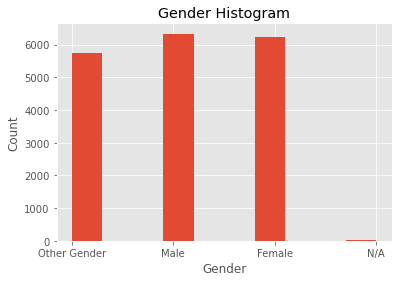

In [29]:
plt.hist(raisely_df['Gender'])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Histogram");

In [30]:
raisely_df.sample(5)

,Uuid,Postcode,Country,Age,Gender,Private Spencer Tunick,Private Is It Time For A Skin Check,Private Diagnosis,Private Skintype,Private Howmanysunburns,...,Private Where,Private Howlonginaustraila,Private Familyskincancertype,Private Whodoyougetcheckedwith,Private Skin Check Before,Private Tanorburn,Private Skin Cancer Risk Assessment,Private Title,Tags,created_on
1817,1.886279e+38,6327,Australia,67,Male,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,People who've been checked at our Pop-Up Clini...,13/06/2022
14795,1.076851e+38,7109,Australia,13,Female,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05/05/2020
6690,2.056755e+38,7016,Australia,84,Female,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05/05/2020
3363,2.126990e+38,2034,Australia,91,Male,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18/06/2020
17932,3.301283e+38,2617,Australia,21,Other Gender,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,People who've been checked at our Pop-Up Clini...,27/04/2020


#### Cleanup Private Diagnosis

In [31]:
raisely_df['Private Diagnosis'].value_counts()

N/A                                 28
Growing Melanocytic Neavus\n         3
Solar Keratosis                      2
Melanoma                             1
Solar Keratosis\nSCC                 1
BCC\nSCC                             1
SCC\nBowen's disease                 1
Growing Melanocytic Neavus           1
SCC                                  1
BCC                                  1
melanoma\nsolar keratosis            1
Growing melanocytic naevus\n         1
Bowen's Disease\nSolar Keratosis     1
Name: Private Diagnosis, dtype: int64

In [32]:
# replace /n with a 'space'
raisely_df['Private Diagnosis'] = raisely_df['Private Diagnosis'].replace(r'\\n',' ', regex=True) 

In [33]:
raisely_df['Private Diagnosis'].value_counts()

N/A                                28
Growing Melanocytic Neavus          3
Solar Keratosis                     2
Melanoma                            1
Solar Keratosis SCC                 1
BCC SCC                             1
SCC Bowen's disease                 1
Growing Melanocytic Neavus          1
SCC                                 1
BCC                                 1
melanoma solar keratosis            1
Growing melanocytic naevus          1
Bowen's Disease Solar Keratosis     1
Name: Private Diagnosis, dtype: int64

#### Cleanup Private Suss Spots Found

In [34]:
raisely_df['Private Suss Spots Found'].value_counts()

Yes    40
N/A    28
yes     4
Name: Private Suss Spots Found, dtype: int64

In [35]:
raisely_df['Private Suss Spots Found'] = raisely_df['Private Suss Spots Found'].replace('yes','Yes') 

In [36]:
raisely_df['Private Suss Spots Found'].value_counts()

Yes    44
N/A    28
Name: Private Suss Spots Found, dtype: int64

#### Cleanup the date format for 'Private Skin Check Date'

In [37]:
# tidy field

raisely_df['Private Skin Check Date'] = raisely_df['Private Skin Check Date'].fillna("")
raisely_df['Private Skin Check Date'] = raisely_df['Private Skin Check Date'].astype(str).str[0:10]

In [38]:
# transform field
check_year = raisely_df['Private Skin Check Date'].str[0:4]
check_month = raisely_df['Private Skin Check Date'].str[5:7]
check_day = raisely_df['Private Skin Check Date'].str[-2:]

# build the new date field
raisely_df['Private Skin Check Date'] = check_day + '/' + check_month + '/' + check_year

# replace // with NaN
raisely_df['Private Skin Check Date'] = raisely_df['Private Skin Check Date'].replace('//',np.NaN)

#### Add a Locality/State column based on the Postcode

In [39]:
# perform inner join between main Raisely dataframe and the Postcode/State lookup table
master_df = pd.merge(raisely_df, pc_state_lookup, 
                      on ='Postcode', 
                      how ='inner')

In [40]:
raisely_cols = [
    'Uuid',
    'created_on',
    'Postcode',
    'Locality',
    'State',
    'Country',
    'Age',
    'Gender',
    'Private Spencer Tunick',
    'Private Is It Time For A Skin Check',
    'Private Diagnosis',
    'Private Skintype',
    'Private Howmanysunburns',
    'Private Suss Spots Found',
    'Private Whynoskincheck',
    'Private Average Sun Exp',
    'Private Event',
    'Private Events Attended',
    'Private Clinic Name',
    'Private How Many',
    'Private Whatskincancer',
    'Private Skincancerhistory',
    'Private Howoften',
    'Private Skin Check Date',
    'Private Skin Check Clinic',
    'Private Anysussspots',
    'Private Where',
    'Private Howlonginaustraila',
    'Private Familyskincancertype',
    'Private Whodoyougetcheckedwith',
    'Private Skin Check Before',
    'Private Tanorburn',
    'Private Skin Cancer Risk Assessment',
    'Private Title'
]

master_df.to_excel("Raisely_Cleaned.xlsx", columns = raisely_cols, index=False)

In [41]:
print("Raisely data cleaned!")

Raisely data cleaned!


### Tags data cleaning/transform

In [42]:
# copy over Tag and ID fields to new Tag dataframe
tag_df = master_df[['Uuid', 'Tags']].copy()

# drop rows that have no tags
tag_df.dropna(inplace=True)

In [43]:
tag_df.head()

,Uuid,Tags
5,1.059054e+38,Everyone who's had a skin check (and we know w...
13,1.392925e+38,People who've been checked at our Pop-Up Clini...
21,2.969909e+38,Everyone who's had a skin check (and we know w...
22,5.761895e+36,People who've been checked at our Pop-Up Clini...
30,1.893241e+38,People who've been checked at our Pop-Up Clini...


In [44]:
# split tags into 3 separate fields based on delimiter
tag_df[['Tag1','Tag2','Tag3']] = tag_df.Tags.str.split(',',expand=True)

# drop old tags fields]
tag_df = tag_df.drop(['Tags'], axis=1)

In [45]:
# pivot data
tag_df = pd.melt(tag_df, id_vars='Uuid', value_name='Tags')

# drop var_name column (defaults to 'variable')
tag_df = tag_df.drop('variable', axis=1)

# Remove rows where Tag = None
tag_df = tag_df.replace(to_replace='None', value=np.nan).dropna()

tag_df.head()

,Uuid,Tags
0,1.059054e+38,Everyone who's had a skin check (and we know w...
1,1.392925e+38,People who've been checked at our Pop-Up Clinics
2,2.969909e+38,Everyone who's had a skin check (and we know w...
3,5.761895e+36,People who've been checked at our Pop-Up Clinics
4,1.893241e+38,People who've been checked at our Pop-Up Clinics


In [46]:
tag_df.to_csv("Tags_Cleaned.csv", index=False)

In [47]:
print("Tags data cleaned!")
print("Operation completed!")

Tags data cleaned!
Operation completed!
